In [9]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: plotly in c:\users\sarwa\hackathon\datathon\mta-datathon\env\lib\site-packages (5.24.1)




[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Obtaining dependency information for matplotlib!=3.6.1,>=3.4 from https://files.pythonhosted.org/packages/8b/ce/15b0bb2fb29b3d46211d8ca740b96b5232499fc49200b58b8d571292c9a6/matplotlib-3.9.2-cp311-cp311-win_amd64.whl.metadata
  Using cached matplotlib-3.9.2-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/8d/2f/804f02ff30a7fae21f98198828d0857439ec4c91a96e20cf2d6c49372966/contourpy-1.3.0-cp311-cp311-win_amd64.whl.metadata
  Using cached contourpy-1.3.0-cp311-cp311-win_amd64.whl.metadata (5.4 kB)
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb31


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install sodapy

  Obtaining dependency information for sodapy from https://files.pythonhosted.org/packages/d8/27/f092405731decf73bde86b1468ad7d44a5e2623a93101dac0b0d8bd3f914/sodapy-2.2.0-py2.py3-none-any.whl.metadata
  Using cached sodapy-2.2.0-py2.py3-none-any.whl.metadata (15 kB)
  Obtaining dependency information for requests>=2.28.1 from https://files.pythonhosted.org/packages/f9/9b/335f9764261e915ed497fcdeb11df5dfd6f7bf257d4a6a2a686d80da4d54/requests-2.32.3-py3-none-any.whl.metadata
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Obtaining dependency information for charset-normalizer<4,>=2 from https://files.pythonhosted.org/packages/57/ec/80c8d48ac8b1741d5b963797b7c0c869335619e13d4744ca2f67fc11c6fc/charset_normalizer-3.3.2-cp311-cp311-win_amd64.whl.metadata
  Using cached charset_normalizer-3.3.2-cp311-cp311-win_amd64.whl.metadata (34 kB)
  Obtaining dependency information for idna<4,>=2.5 from https://files.pythonhosted.org/packages/76/c6/c88e154df9c4e1a2a66ccf0005a88dfb265


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata
from passwords import *

#  Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.ny.gov", token)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.ny.gov,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("wujg-7c2s", limit=2000) # increase limit if you want more data
results = client.get("wujg-7c2s", limit=2000) # increase limit if you want more data

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)



In [6]:
results_df.infer_objects()

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,georeference,:@computed_region_kjdx_g34t,:@computed_region_yamh_8v7k,:@computed_region_wbg7_3whc
0,2023-03-15T17:00:00.000,subway,127,DeKalb Av (L),Brooklyn,metrocard,Metrocard - Seniors & Disability,11.0,0.0,40.70381,-73.91843,"{'type': 'Point', 'coordinates': [-73.91843, 4...",2090,894,820
1,2023-03-15T13:00:00.000,subway,605,"168 St (A,C,1)",Manhattan,metrocard,Metrocard - Students,11.0,0.0,40.840717,-73.93956,"{'type': 'Point', 'coordinates': [-73.93956, 4...",2095,749,791
2,2023-03-15T13:00:00.000,subway,158,"86 St (C,B)",Manhattan,metrocard,Metrocard - Unlimited 7-Day,31.0,0.0,40.78587,-73.96892,"{'type': 'Point', 'coordinates': [-73.96892, 4...",2095,749,751
3,2023-03-15T11:00:00.000,subway,621,"Broadway Junction (A,C,J,L,Z)",Brooklyn,omny,OMNY - Full Fare,65.0,11.0,40.678333,-73.90532,"{'type': 'Point', 'coordinates': [-73.90532, 4...",2090,894,816
4,2023-03-15T21:00:00.000,subway,212,"Kingsbridge Rd (B,D)",Bronx,metrocard,Metrocard - Full Fare,8.0,0.0,40.866978,-73.89351,"{'type': 'Point', 'coordinates': [-73.89351, 4...",2032,307,654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2023-03-15T06:00:00.000,subway,608,"4 Av (F,G)/9 St (R)",Brooklyn,metrocard,Metrocard - Full Fare,53.0,7.0,40.67085,-73.988304,"{'type': 'Point', 'coordinates': [-73.988304, ...",2090,894,893
1996,2023-03-15T14:00:00.000,subway,221,21 St-Queensbridge (F),Queens,metrocard,Metrocard - Fair Fare,24.0,3.0,40.754204,-73.94283,"{'type': 'Point', 'coordinates': [-73.94283, 4...",2137,196,873
1997,2023-03-15T17:00:00.000,subway,624,"Chambers St (A,C)/WTC (E)/Park Pl (2,3)/Cortla...",Manhattan,omny,OMNY - Full Fare,3980.0,10.0,40.71411,-74.00858,"{'type': 'Point', 'coordinates': [-74.00858, 4...",2095,749,723
1998,2023-03-15T12:00:00.000,subway,85,"75 St-Elderts Ln (J,Z)",Queens,metrocard,Metrocard - Other,1.0,0.0,40.691322,-73.86714,"{'type': 'Point', 'coordinates': [-73.86714, 4...",2137,196,1168


In [4]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   transit_timestamp            2000 non-null   object
 1   transit_mode                 2000 non-null   object
 2   station_complex_id           2000 non-null   object
 3   station_complex              2000 non-null   object
 4   borough                      2000 non-null   object
 5   payment_method               2000 non-null   object
 6   fare_class_category          2000 non-null   object
 7   ridership                    2000 non-null   object
 8   transfers                    2000 non-null   object
 9   latitude                     2000 non-null   object
 10  longitude                    2000 non-null   object
 11  georeference                 2000 non-null   object
 12  :@computed_region_kjdx_g34t  1969 non-null   object
 13  :@computed_region_yamh_8v7k  2000

In [13]:
results_df.infer_objects()

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,georeference,:@computed_region_kjdx_g34t,:@computed_region_yamh_8v7k,:@computed_region_wbg7_3whc
0,2023-08-30T07:00:00.000,subway,358,"Newkirk Av-Little Haiti (2,5)",Brooklyn,metrocard,Metrocard - Unlimited 7-Day,82.0,0.0,40.63997,-73.94841,"{'type': 'Point', 'coordinates': [-73.94841, 4...",2090,894,888
1,2023-08-30T18:00:00.000,subway,301,181 St (1),Manhattan,metrocard,Metrocard - Unlimited 30-Day,26.0,0.0,40.849506,-73.93359,"{'type': 'Point', 'coordinates': [-73.93359, 4...",2095,749,792
2,2023-08-30T12:00:00.000,subway,4,"Broadway (N,W)",Queens,metrocard,Metrocard - Unlimited 30-Day,34.0,0.0,40.76182,-73.92551,"{'type': 'Point', 'coordinates': [-73.92551, 4...",2137,196,878
3,2023-08-30T23:00:00.000,subway,607,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,metrocard,Metrocard - Full Fare,195.0,3.0,40.749718,-73.98782,"{'type': 'Point', 'coordinates': [-73.98782, 4...",2095,749,717
4,2023-08-30T13:00:00.000,subway,59,9 Av (D),Brooklyn,metrocard,Metrocard - Students,5.0,0.0,40.646294,-73.99432,"{'type': 'Point', 'coordinates': [-73.99432, 4...",2090,894,897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2023-08-30T13:00:00.000,subway,405,23 St (6),Manhattan,metrocard,Metrocard - Unlimited 7-Day,94.0,0.0,40.739864,-73.9866,"{'type': 'Point', 'coordinates': [-73.9866, 40...",2095,749,734
1996,2023-08-30T11:00:00.000,subway,301,181 St (1),Manhattan,metrocard,Metrocard - Unlimited 7-Day,47.0,0.0,40.849506,-73.93359,"{'type': 'Point', 'coordinates': [-73.93359, 4...",2095,749,792
1997,2023-08-30T17:00:00.000,subway,612,"Lexington Av-53 St (E,M)/51 St (6)",Manhattan,metrocard,Metrocard - Fair Fare,80.0,3.0,40.757553,-73.969055,"{'type': 'Point', 'coordinates': [-73.969055, ...",2095,749,749
1998,2023-08-30T07:00:00.000,subway,635,"South Ferry (1)/Whitehall St (R,W)",Manhattan,metrocard,Metrocard - Students,3.0,1.0,40.703087,-74.01299,"{'type': 'Point', 'coordinates': [-74.01299, 4...",2095,749,720


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

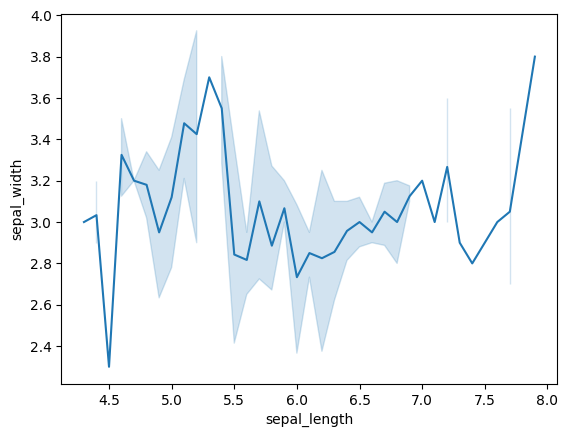

In [16]:
# importing packages
import seaborn as sns
# loading dataset
data = sns.load_dataset("iris")
# draw lineplot
sns.lineplot(x="sepal_length", y="sepal_width", data=data)

# Load the custom dataset (for example, a CSV file)
data = pd.read_csv("your_custom_dataset.csv")  # Replace with your file path

# Draw a lineplot using Seaborn
sns.lineplot(x="your_x_column", y="your_y_column", data=data)